In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

In [5]:
# ensure the probability adds up to 1
true_data = np.array([0.02, 0.03, 0.05, 0.14, 0.16, 0.15, 0.12, 0.08, 0.1, 0.08, 0.07])

n     = true_data.shape[0]
index = np.arange(n)

assert sum(true_data) == 1.0

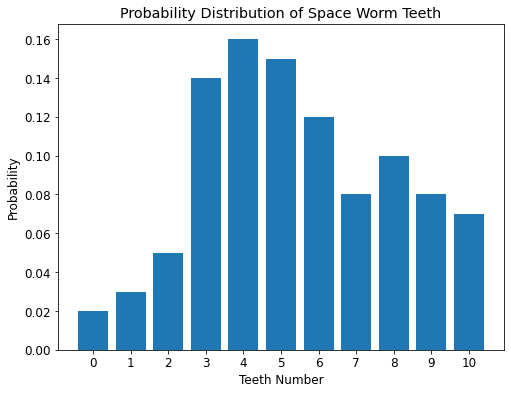

In [6]:
# change default style figure and font size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

plt.bar(index, true_data)
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth')
plt.ylabel('Probability')
plt.xticks(index);

#### uniform distribution

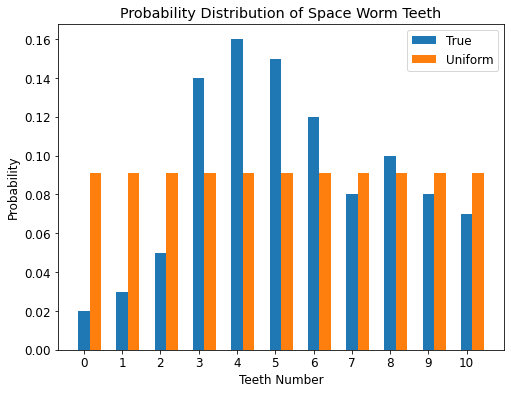

In [7]:
uniform_data = np.full(n, 1.0 / n)

# we can plot our approximated distribution against the original distribution
width = 0.3
plt.bar(index, true_data, width=width, label='True')
plt.bar(index + width, uniform_data, width=width, label='Uniform')
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend();

#### Another option is to use a binomial distribution.

In [8]:
# we estimate the parameter of the binomial distribution
p = true_data.dot(index) / n
print('p for binomial distribution:', p)
binom_data = binom.pmf(index, n, p)
binom_data

p for binomial distribution: 0.4945454545454545


array([0.00055018, 0.00592134, 0.0289677 , 0.08502751, 0.16638476,
       0.22791121, 0.22299226, 0.15584249, 0.07623949, 0.02486468,
       0.00486561])

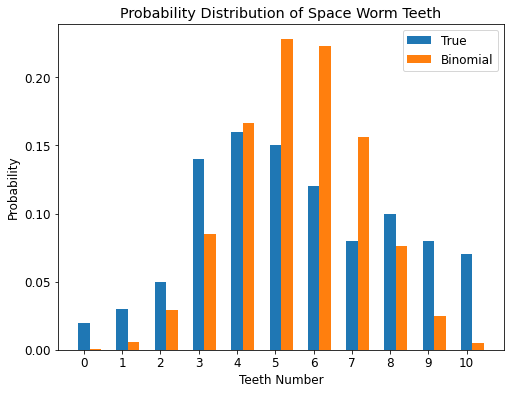

In [9]:
width = 0.3
plt.bar(index, true_data, width=width, label='True')
plt.bar(index + width, binom_data, width=width, label='Binomial')
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth')
plt.ylabel('Probability')
plt.xticks(np.arange(n))
plt.legend();

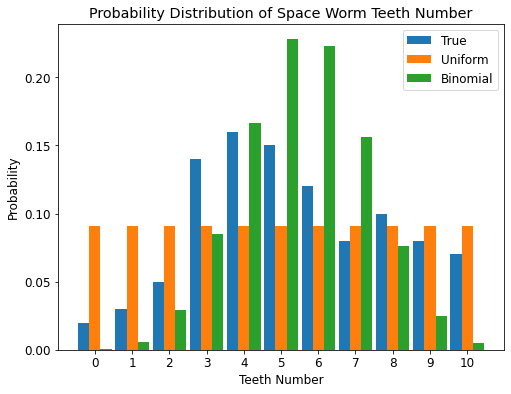

In [10]:
plt.bar(index - width, true_data, width=width, label='True')
plt.bar(index, uniform_data, width=width, label='Uniform')
plt.bar(index + width, binom_data, width=width, label='Binomial')
plt.xlabel('Teeth Number')
plt.title('Probability Distribution of Space Worm Teeth Number')
plt.ylabel('Probability')
plt.xticks(index)
plt.legend();

In [11]:
# both function are equivalent ways of computing KL-divergence
# one uses for loop and the other uses vectorization
def compute_kl_divergence(p_probs, q_probs):
    """"KL (p || q)"""
    kl_div = 0.0
    for p, q in zip(p_probs, q_probs):
        kl_div += p * np.log(p / q)

    return kl_div


def compute_kl_divergence(p_probs, q_probs):
    """"KL (p || q)"""
    kl_div = p_probs * np.log(p_probs / q_probs)
    return np.sum(kl_div)

In [12]:
print('KL(True||Uniform): ', compute_kl_divergence(true_data, uniform_data))
print('KL(True||Binomial): ', compute_kl_divergence(true_data, binom_data))

KL(True||Uniform):  0.13667971094966938
KL(True||Binomial):  0.328194353114021


In [18]:
print('KL(Uniform||True): ',  compute_kl_divergence(uniform_data, true_data ))
print('KL(Binomial||True): ', compute_kl_divergence(binom_data,  true_data ))

KL(Uniform||True):  0.1697132213882266
KL(Binomial||True):  0.2114354639606459


ne caveat to note is that it may be tempting to think of KL-divergence as a way of measuring distance, however, whenever we talk about KL-divergence, we do not categorized it as a distance metric due to the fact that it is asymmetric. In other words,  $D_{KL}(p||q) ≠ D_{KL}(q||p) $ .

In [19]:
from scipy.special import rel_entr

In [20]:
sum(rel_entr(true_data, uniform_data))

0.13667971094966938

In [21]:
sum(rel_entr(binom_data,  true_data))

0.2114354639606459